### Fencing matches - preliminary analysis

In [1]:
%load_ext autoreload
    
%autoreload 2

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

import sys
sys.path.append("../")

from fencing.keypoints import load_key_point
from fencing.feature_extraction import extract_features
from fencing.openpose import POSE_LABELS
from fencing.visualization import plot_key_points, plot_key_point_sequence, visualize_features, \
    load_video, setup_figure, plot_all_from_clip

%matplotlib inline

In [2]:
df = pd.read_csv('../data/Kaggle/ClipDescriptorKaggle.csv')
df.head()

id          ClipName                                          URL  \
0   1  0001_002_00_01_1  https://www.youtube.com/watch?v=uho2ldovj7o   
1   2  0001_002_00_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   
2   3  0001_002_01_01_1  https://www.youtube.com/watch?v=uho2ldovj7o   
3   4  0001_002_01_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   
4   5  0001_002_02_02_1  https://www.youtube.com/watch?v=uho2ldovj7o   

   Start_frame  End_frame  Light1  Light2 Hit_label  
0      22750.0    22825.0       2       2     0-0-1  
1      24684.0    24759.0       2       2     1-0-0  
2      27330.0    27405.0       2       1     1-0-0  
3      28051.0    28126.0       2       2     0-0-1  
4      34040.0    34115.0       2       2     0-0-1

In [3]:
df_kp = load_key_point('../data/Kaggle/FencersKeyPoints/0001_002_00_02_1.json')

[[[0.00000e+00 0.00000e+00 0.00000e+00]
  [1.42000e+02 1.36000e+02 5.50539e-01]
  [1.57000e+02 1.36000e+02 6.17863e-01]
  [1.56000e+02 1.67000e+02 4.84502e-01]
  [1.54000e+02 1.86000e+02 2.52805e-01]
  [1.28000e+02 1.36000e+02 4.45165e-01]
  [1.08000e+02 1.35000e+02 8.74269e-02]
  [0.00000e+00 0.00000e+00 0.00000e+00]
  [1.28000e+02 1.83000e+02 6.48446e-01]
  [1.40000e+02 1.84000e+02 5.89399e-01]
  [1.77000e+02 2.03000e+02 7.66900e-01]
  [1.77000e+02 2.51000e+02 7.26929e-01]
  [1.15000e+02 1.82000e+02 6.37756e-01]
  [9.90000e+01 2.13000e+02 7.75989e-01]
  [7.30000e+01 2.50000e+02 7.85522e-01]
  [0.00000e+00 0.00000e+00 0.00000e+00]
  [0.00000e+00 0.00000e+00 0.00000e+00]
  [1.58000e+02 1.18000e+02 2.05278e-01]
  [1.38000e+02 1.20000e+02 7.96591e-02]
  [8.10000e+01 2.53000e+02 4.35838e-01]
  [7.90000e+01 2.52000e+02 3.52609e-01]
  [6.70000e+01 2.54000e+02 6.80338e-01]
  [1.84000e+02 2.48000e+02 2.08317e-01]
  [1.84000e+02 2.52000e+02 3.29204e-01]
  [1.75000e+02 2.54000e+02 6.98536e-01]]

### Feature extraction

In [10]:
import random

def get_random_df_kp():
    clip_name = random.choice(df.ClipName.unique()[:100])
    print("clip_name:", clip_name)
    df_kp = load_key_point('../data/Kaggle/FencersKeyPoints/{}.json'.format(clip_name))    
    return df_kp, clip_name


df_kp, clip_name = get_random_df_kp()

clip_name: 0001_002_19_01_1


In [11]:
# 0001_002_25_01_1

../fencing/feature_extraction.py:19: RuntimeWarning: Mean of empty slice
  left_leg = np.nanmean(frame[[14, 19, 20, 21]][:, :2], axis=0)


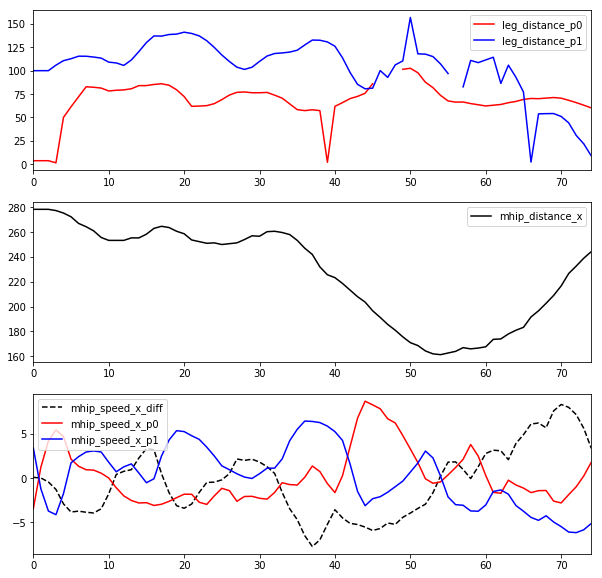

In [12]:
df_fe = extract_features(df_kp)
visualize_features(df_fe)

../fencing/visualization.py:57: RuntimeWarning: invalid value encountered in greater
  mask = X[0].mean(axis=1) > 1
../fencing/visualization.py:62: RuntimeWarning: invalid value encountered in greater
  mask = X[1].mean(axis=1) > 1
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


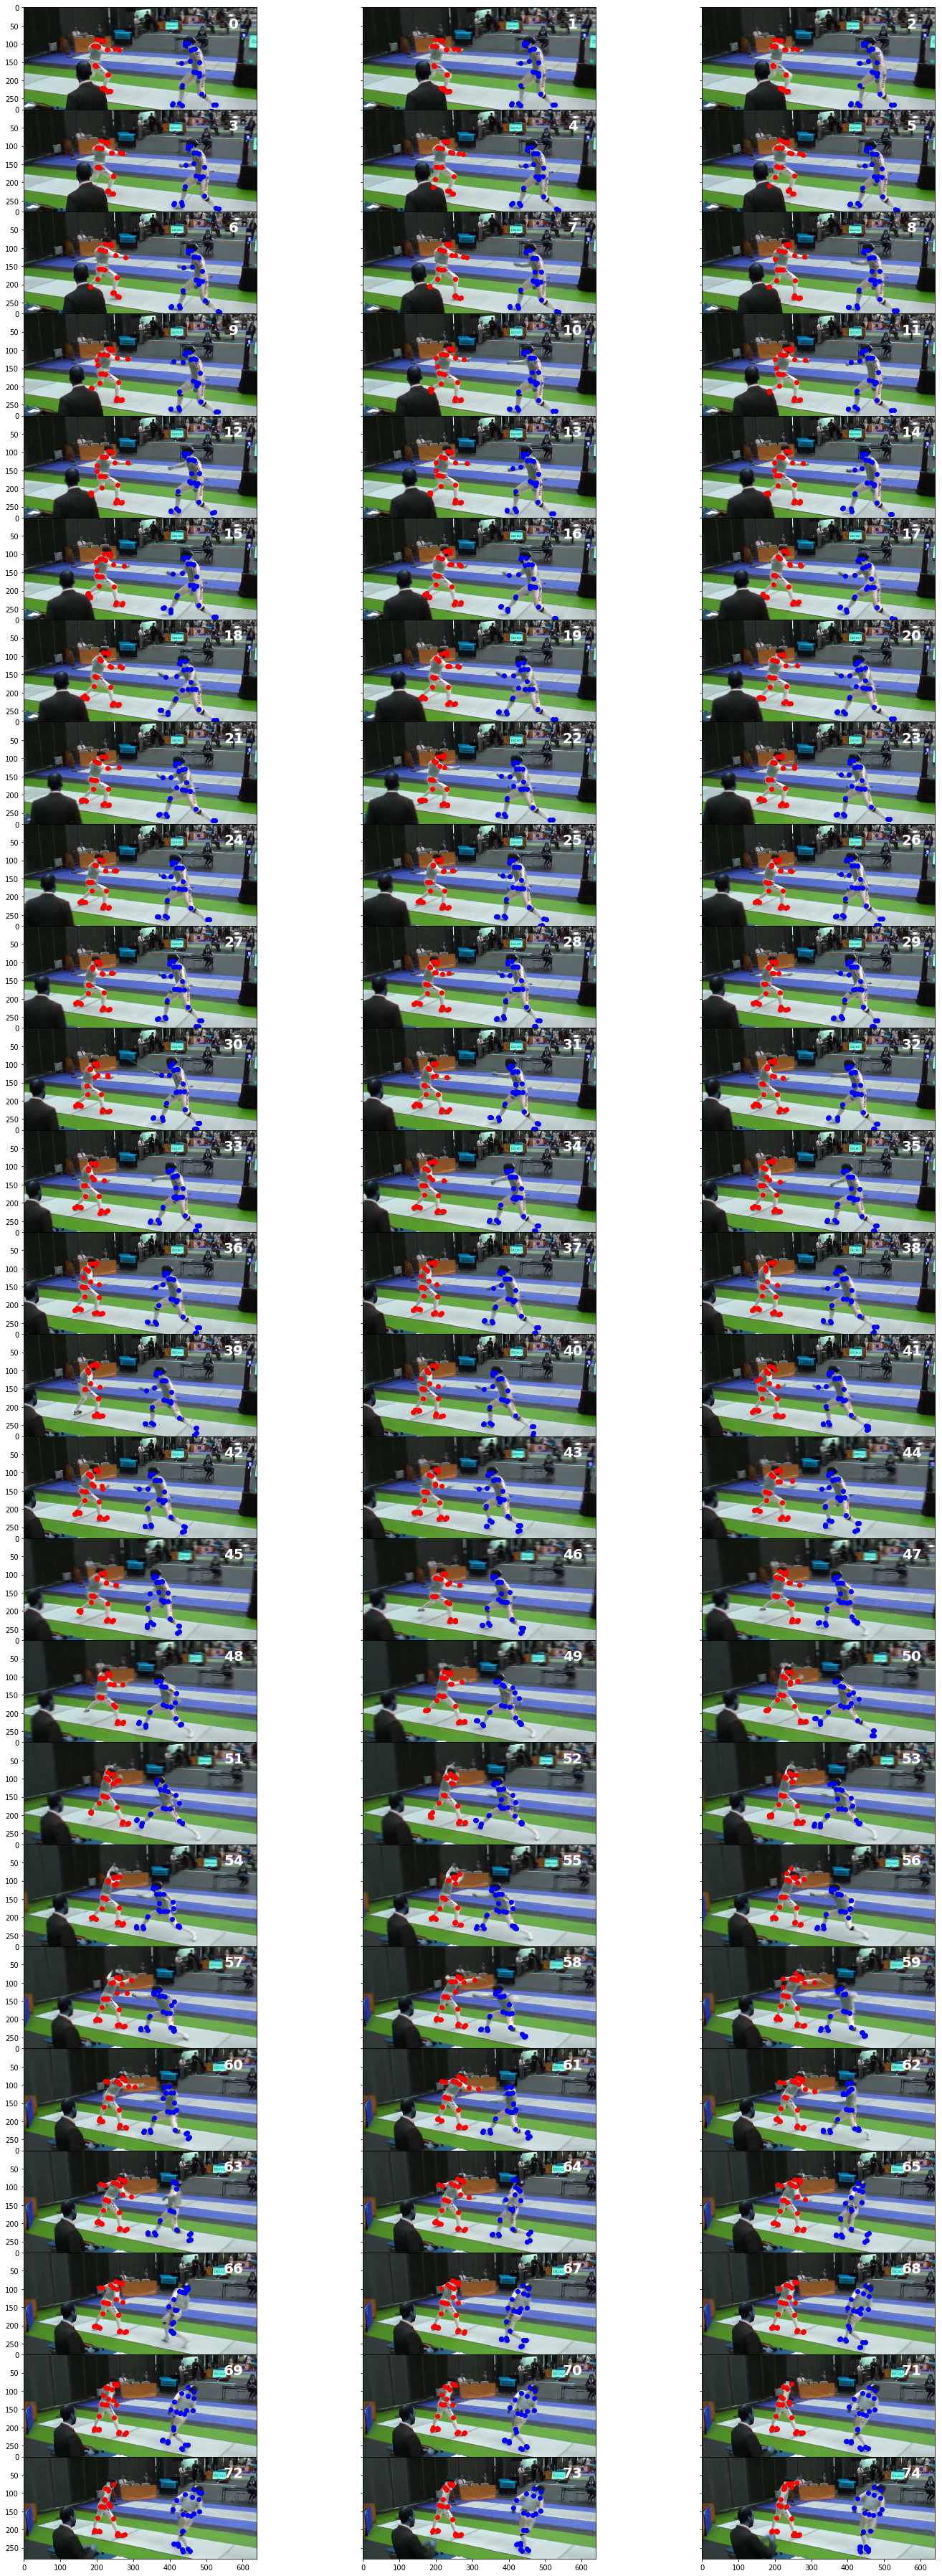

<Figure size 432x288 with 0 Axes>

In [13]:
cap = load_video()

f, axs = setup_figure()
start = df[df.ClipName == clip_name]["Start_frame"].values[0]
plot_all_from_clip(df_kp, start, axs, cap)
plt.tight_layout()
plt.show()
plt.close(f)